In [3]:
from __future__ import print_function 
import pandas as pd

# Find data on the portal

 using DHS data on shelter population
 obtained with the following steps from the website 
 
 https://opendata.cityofnewyork.us/ -> Data 
 
 https://opendata.cityofnewyork.us/data/ -> Department of Homeless Services (DHS) (in data by agency)
 
 https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Homeless+Services+%28DHS%29
 -> DHS daily report
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m -> View Data 
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m/data -> Export
 
 this gives me various links. I copy and paste below the CSV link

# solution 1: download from the portal 


In [4]:
!curl https://data.cityofnewyork.us/api/views/y43c-5n92/rows.csv?accessType=DOWNLOAD > test_1.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70870    0 70870    0     0   248k      0 --:--:-- --:--:-- --:--:--  248k


In [5]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mp4515/PUIdata


In [6]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mp4515/PUIdata


In [7]:
# move the data
!mv test_1.csv $PUIDATA

In [8]:
#test if the data is there
!ls $PUIDATA

myfirstfile.txt  README.md  test_1.csv	test.csv


## read in the data with pandas

In [9]:
#read in the data with pandas
WQ = pd.read_csv("%s/test_1.csv"%os.getenv("PUIDATA"))

In [10]:
#print the fist 8 lines out
WQ.head(8)

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,05/10/2015,NaN,1.0,0.95,0.95,1.00,1.00,0.98,<1
1,DEL18DT,05/11/2015,1.0,1.1,0.95,1.00,1.10,1.10,1.04,<1
2,DEL18DT,05/12/2015,1.1,1.1,1.10,0.90,0.95,1.10,1.04,1
3,DEL18DT,05/13/2015,0.9,1.1,0.95,0.90,1.00,0.95,0.97,1
4,DEL18DT,05/14/2015,1.1,1.0,1.00,0.95,0.95,0.95,0.99,<1
5,DEL18DT,05/15/2015,1.0,1.0,1.00,0.90,0.95,1.00,0.98,<1
6,DEL18DT,05/16/2015,1.1,1.0,1.00,0.75,0.85,0.95,0.94,<1
7,DEL18DT,05/17/2015,0.9,0.9,0.85,0.80,0.85,0.85,0.86,2


In [11]:
#print the last 3 lines out
WQ.tail(3)

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
1333,DEL18DT,08/29/2018,0.80,0.75,0.75,0.65,0.75,0.80,0.75,<1
1334,DEL18DT,08/30/2018,0.80,0.80,0.70,0.70,0.75,0.85,0.77,E3
1335,DEL18DT,08/31/2018,0.75,0.75,0.70,0.65,0.75,0.70,0.72,E1


In [12]:
#look at the columns available, those are the variables
WQ.columns

Index([u'Site', u'Date', u'Turbidity(NTU) at 12AM', u'Turbidity(NTU) at 4AM',
       u'Turbidity(NTU) at 8AM', u'Turbidity(NTU) at 12PM',
       u'Turbidity(NTU) at 4PM', u'Turbidity(NTU) at 8PM',
       u'Average 24hrTurbidity(NTU)', u'Coliform, Fecal(fc/100mL)'],
      dtype='object')

In [13]:
#count how many rows, those are the data points
WQ.size

13360

In [14]:
#select 2 columns only for plotting
WQ_2c = WQ[['Turbidity(NTU) at 4AM', 'Turbidity(NTU) at 12PM']]

In [15]:
WQ_2c.head()

,Turbidity(NTU) at 4AM,Turbidity(NTU) at 12PM
0,1.0,0.95
1,1.1,1.00
2,1.1,0.90
3,1.1,0.90
4,1.0,0.95


In [16]:
x=WQ_2c['Turbidity(NTU) at 4AM']

In [17]:
y=WQ_2c['Turbidity(NTU) at 12PM']
y.size
x.size

1336

## plot the data

In [18]:
WQ_2c.plot(x="Turbidity(NTU) at 4AM", y="Turbidity(NTU) at 12PM")

In [19]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
from matplotlib import pyplot as plt


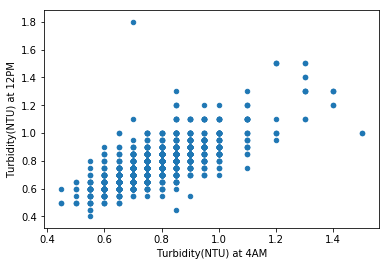

In [22]:
WQ_2c.plot(x="Turbidity(NTU) at 4AM", y="Turbidity(NTU) at 12PM", kind='scatter');
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

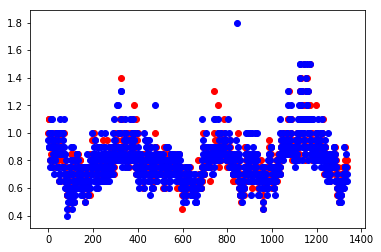

In [23]:
z=[]
for i in range(1336):
    z.append(i)
plt.scatter(z,x,color='red')
plt.scatter(z,y,color='blue')
plt.show()

Figure 1: Difference in turbidity at different times on same day. Although there is very high correlation, it also means that there seems to be no difference in water quality supplied in different times of the day. 

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [24]:
url = "https://data.cityofnewyork.us/resource/8c3c-yspd.json"

In [25]:
#use the appropriatepandas function to read in the json file
qual = pd.read_json(url)

In [26]:
# print it out
qual.head(3)

,average_24hrturbidity_ntu,coliform_fecal_fc_100ml,date,site,turbidity_ntu_at_12am,turbidity_ntu_at_12pm,turbidity_ntu_at_4am,turbidity_ntu_at_4pm,turbidity_ntu_at_8am,turbidity_ntu_at_8pm
0,0.94,<1,2015-05-27,DEL18DT,0.8,1.1,0.95,0.95,0.95,0.90
1,0.71,<1,2015-08-28,DEL18DT,0.7,0.7,0.65,0.75,0.65,0.80
2,0.56,<1,2015-08-15,DEL18DT,0.6,0.5,0.55,0.60,0.55,0.55


In [27]:
#now select a date and 2 variables
wq_3c = qual[['date', 'turbidity_ntu_at_12am', 'turbidity_ntu_at_12pm']]

for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [28]:
wq_3c.rename(columns = {'date':'Date', 
               'turbidity_ntu_at_12am':'Turbidity(NTU) at 12am', 
               'turbidity_ntu_at_12pm':'Turbidity(NTU) at 12pm'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


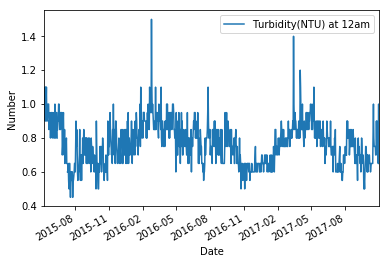

In [29]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = wq_3c.plot(x='Date', y='Turbidity(NTU) at 12am');
ax.set_ylabel("Number");

Figure2: Turbidity of water at 12 am on different days within the data. Seasonal peaks can be spotted. 


In [30]:
wq_3c["Date"] = wq_3c["Date"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


now that I am using timestamps (instead of strings as the data got read in form the json file) Pandas know to rotate the labels appropriately so I can drop rot=90

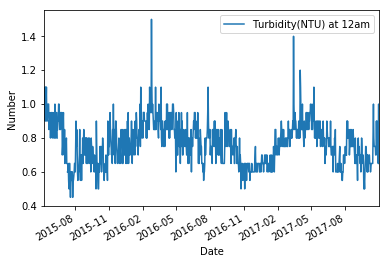

In [31]:
ax = wq_3c.plot(x='Date', y='Turbidity(NTU) at 12am')
ax.set_ylabel("Number");

Figure 3: Turbidity at 12am for different days within data. Seasonal trends can be spotted. 

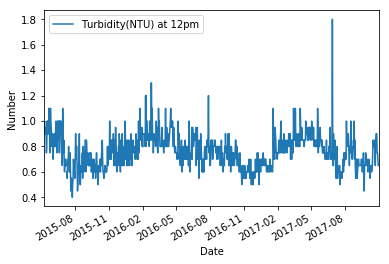

In [32]:
#plot the other columns
ax = wq_3c.plot(x='Date', y='Turbidity(NTU) at 12pm')
ax.set_ylabel("Number");

Figure 3: Turbidity at 12pm for different days within data. Seasonal trends can be spotted. 